# Домашнее задание "Случайные марковские процессы"

— Скачайте текст войны и мир (ссылка на github и гугл диск). Очистите его, оставив только русские буквы и символы пробела. Постройте матрицу переходных вероятностей. Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р; Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов


— Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

Чтение текста в отдельный файл

In [4]:
with open('tom_1.txt', 'r') as f:
    text_1 = f.read().lower()


In [5]:
with open('tom_2.txt', 'r') as f:
    text_2 = f.read().lower()

In [6]:
with open('tom_3.txt', 'r') as f:
    text_3 = f.read().lower()

In [7]:
with open('tom_4.txt', 'r') as f:
    text_4 = f.read().lower()

In [21]:
text = text_1 + text_2 + text_3 + text_4

In [22]:
text = re.sub('[^абвгдеёжзийклмнопрстуфхцчшщъыьэюя]','', text)

In [10]:
# Создание словаря с ключами-буквами русского алфавита и значениями-позицией букв в алфавите
RUSSIAN = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUSSIAN)}

In [24]:
# Инициирование матрицы вероятностей (заполнение нулями)
probabilities = np.zeros((len(RUSSIAN), len(RUSSIAN)))

In [25]:
# Подсчет количества переходов из одной буквы (состояния) в другую букву (состояние)
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [26]:
# Подсчет вероятности перехода из одной буквы в другую
probabilities = probabilities / probabilities.sum(axis=1)[:, None]

In [30]:
df = pd.DataFrame(probabilities, index=(i for i in RUSSIAN), columns=(i for i in RUSSIAN))

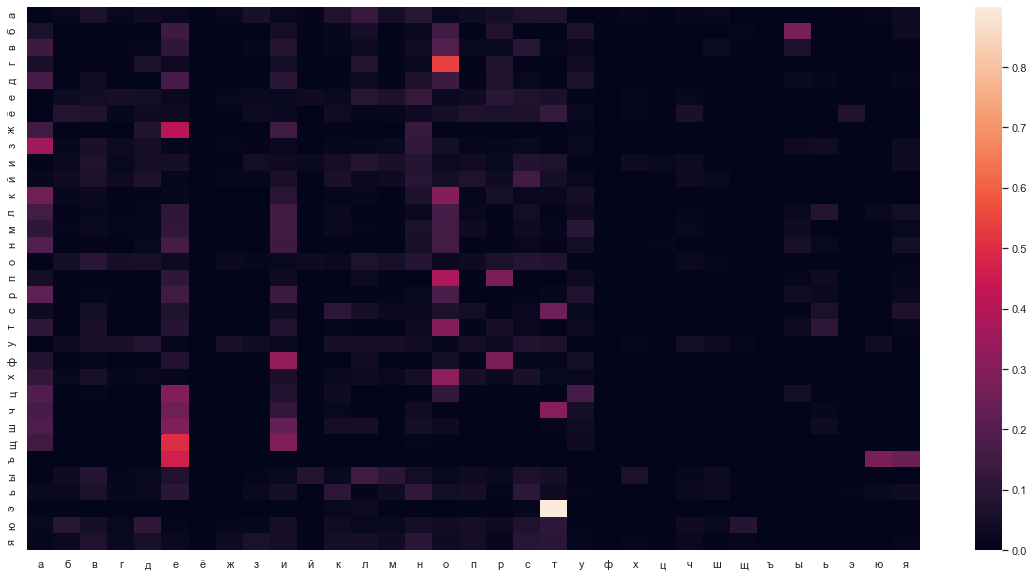

In [38]:
plt.figure(figsize=(20, 10))
sns.heatmap(df)
plt.show()

# Подсчет вероятности встретить строку из 4-х символов, которая начинается п, а кончается на р

In [45]:
start = POS['п']
end = POS['р']
prior = 1. / len(RUSSIAN)
probas = []
words = []

for l in RUSSIAN:
    for i in RUSSIAN:
        proba = prior * probabilities[start, POS[l]] * probabilities[POS[l], POS[i]] * probabilities[POS[i], end]
        words.append(''.join(['п', l, i, 'р']))
        probas.append(proba)
        if proba > 0:
            print(''.join(['п', l, i, 'р']), proba)

паар 2.5207649190691473e-07
пабр 2.2100055338680835e-06
павр 2.2364248211760067e-06
пагр 2.0368560468806e-06
падр 4.2978568154563506e-06
паер 3.275180970536732e-06
пажр 1.5489702095157818e-08
пазр 1.6416824160245962e-06
паир 5.580705698205104e-07
пайр 4.894280194377402e-07
пакр 6.697282476458556e-06
палр 1.0139942820946131e-06
памр 6.44836073686209e-07
панр 4.1933000945591e-07
паор 1.948642054928766e-06
папр 1.522862715316372e-05
парр 8.429879570147815e-08
паср 9.870793534017992e-07
патр 6.812875845405612e-06
паур 3.3316088886209546e-07
пафр 3.917027805184137e-06
пахр 6.096567064423558e-07
пацр 4.296453469702874e-09
пачр 6.49649110891118e-08
пашр 1.7194566520466948e-08
пащр 7.2033459260607656e-09
паэр 3.758078821070711e-08
паюр 4.970424322646765e-07
паяр 8.588254847156067e-07
пбар 3.1236073795011473e-09
пббр 6.854825415865303e-11
пбвр 1.2860882177591123e-10
пбгр 5.5132992762454695e-11
пбдр 1.222421202605786e-10
пбер 1.4130040614324587e-08
пбёр 1.6270448400651633e-12
пбжр 2.787366812684

In [47]:
words_probas = {w: p for w, p in zip(words, probas)}

In [51]:
# Самые высокие вероятности встретить следующие строки из 4 символов, начинающихся на "п" и заканчивающихся на "р"
for k, v in words_probas.items():
    if v > 0.0001:
        print(k, v)

попр 0.00010686523946902817
прер 0.00013158574718183307
прор 0.00010270764738634797


# Сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [56]:
word = []
start = 'б'
word.append(start)
length = 7
for i in range(length):
    index = POS[word[i]]
    next_char = np.random.choice(list(RUSSIAN), p=probabilities[index])
    word.append(next_char)

print (''.join(word))

бымужеша


# Выберите ряд из предыдущих домашних заданий по временным рядам и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [58]:
pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 KB 1.2 MB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/Users/glebmutovin/Downloads/ENTER/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [70]:
from hmmlearn.hmm import GaussianHMM

In [60]:
airlines_passengers = pd.read_csv("/Users/glebmutovin/Data_Science/DataScience_Netology/Machine_learning/TimeSeries/1._Лекция/Series/international-airline-passengers.csv")

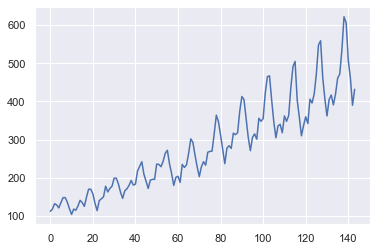

In [63]:
plt.plot(airlines_passengers['Count'])

In [65]:
series = airlines_passengers['Count']

In [81]:
# Сделаем ряд стационарным
from scipy.stats import boxcox
changed_ts = boxcox(series, 0)
changed_ts = changed_ts[1:] - changed_ts[:-1]
changed_ts = changed_ts[12:] - changed_ts[:-12]

In [86]:
changed_ts = pd.Series(changed_ts)

In [87]:
values = changed_ts.values.reshape(-1,1)

In [88]:
# Построим модели с разным количеством компонент
for i in range(1, 15):
    model_hmm = GaussianHMM(n_components=i, covariance_type="diag", n_iter=1000)
    model_hmm.fit(values)
    print(i, model_hmm.score(values))

1 218.37583783534652
2 221.91970776912626
3 232.113687797452
4 232.7629685951236
5 231.20153953978695
6 232.7172128066348


Fitting a model with 142 free scalar parameters with only 131 data points will result in a degenerate solution.


7 231.77145268051885
8 232.75836487433813
9 233.80997733592494
10 233.79397036091893


Fitting a model with 167 free scalar parameters with only 131 data points will result in a degenerate solution.
Fitting a model with 194 free scalar parameters with only 131 data points will result in a degenerate solution.
Fitting a model with 223 free scalar parameters with only 131 data points will result in a degenerate solution.


11 217.90863957135923
12 217.59894052292114
13 216.8425697119198
14 216.08384038563048


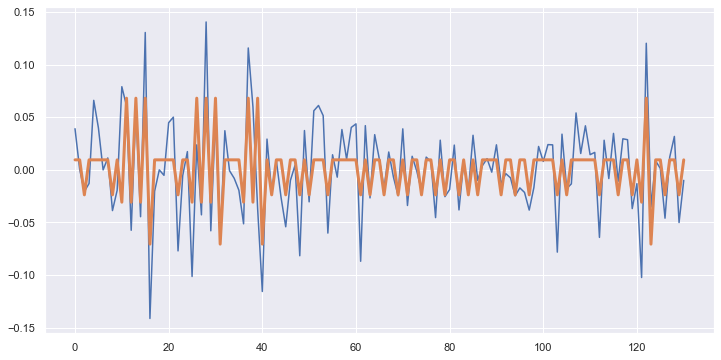

In [98]:
model = GaussianHMM(n_components=9,
                        covariance_type="diag",
                        n_iter=100000)
model.fit(values)
labels = model.predict(values)
means = np.zeros_like(values)
for i in range(model.n_components):
    means[labels == i] = model.means_[i]
    
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means, linewidth=3)

In [100]:
model.score(values)

233.80015396530666

In [109]:
list(model.means_.reshape(1, 9)[0])

[0.06324388625950438,
 -0.01704209788446543,
 0.06822705013491018,
 -0.023735724824272764,
 -0.07062533729388021,
 0.06326867005063315,
 -0.017070324477407355,
 -0.030721483524773,
 0.009550174994620384]

In [147]:
history_means = list(model.means_.reshape(1, 9)[0])

In [148]:
predictions = []

In [149]:
# Какой-то наивный прогноз
for i in range(1, 11):
    y_pred = history_means[-1]
    predictions.append(y_pred)
    history_means.append(history_means[i])
    

In [150]:
means.shape

(131, 1)

In [151]:
pred_arr = np.array(predictions).reshape(10, 1)

In [152]:
means_with_pred = np.append(means, pred_arr)

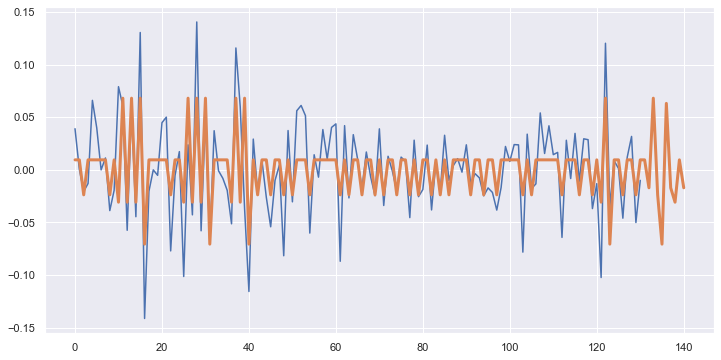

In [153]:
plt.figure(figsize=(12, 6))
plt.plot(values)
plt.plot(means_with_pred, linewidth=3)